##  Naive Bayes Binary Classifier

The Naive Bayes binary classifier is the implementation of a two-class classification algorithm. The code below is tailored for the classification of grayscale images of handwritten digits of 0s and 1s. 
The MNIST dataset, which is a database of greyscale images of handwritten digits from 0 to 9, is available online. The .mat files of only digits 0s and 1s are uploaded in here for convience.

#### STEP1: Loading data


The first step is to load the .mat data subsets of 0s and 1s into 3D numpy arrays. The geneNewData.py file will generate a trainsets of 0s and 1s each containing 5000 images each, and testsets of 0s and 1s containing 980 and 1,135 samples, respectively.

Given that each image sample is 28 x 28 pixels, the input data structure(2 trainsets and 2 tests) is a 3D array – a collection of 2D image arrays of dimensions n x 28 x 28, where n is the number of samples.

The imshow() function in pyplot module of matplotlib library is used to display data as an image. You can use it to display any image in the train and test sets.

#### STEP2: Feature extraction

Features are simply the independent variables that are chosen carefully to build our model. In case of a grayscale image, eacg pixel value is a single number that represents the brightness of the pixel. The most common pixel format is the byte image, where this number is stored as an 8-bit integer giving a range of possible values from 0 to 255. Typically zero is taken to be black, and 255 is taken to be white.

We will be working with a 2D feature vector that comprises the mean and the standard deviation deviation of all the pixel values within an image array.

Note that the features should only be extracted from the train datasets

#### STEP3: Parameters calculation

A supervised learning model is defined by a set of parameters. Based on the 2D datapoints of features generated for the two-class naive bayes classifiers, the following parameters should be calcluated:

● (No.1) Mean of feature1 for digit0
● (No.2) Variance of feature1 for digit0
● (No.3) Mean of feature2 for digit0
● (No.4) Variance of feature2 for digit0
● (No.5) Mean of feature1 for digit1
● (No.6) Variance of feature1 for digit1
● (No.7) Mean of feature2 for digit1
● (No.8) Variance of feature2 for digit1

#### STEP4: Applying the maximum likelihood function

The calculated mean and variance capture the data distribution for the training dataset. Now, we will iterate through the test dataset and calculate the mean (feature1) and standard deviation(feature2) of the pixel brightness for each image like we did for the training dataset. This allows us to compute the probability of observing the calculated feature among the normally distributed training dataset for each label. Therefore,we will use the normal distribution equation for each image, we need the following:

P(feature1 | y=0)
P(feature2 | y=0)
P(feature1 | y=1)
P(feature2 | y=1)

Based on this information, as well the assumption that P(y=0) = P(y=1) = 0.5, we can calculate the posterior probabilities of the labels as follows:

P(y=0 | feature1,feature2) = P(feature1 | y=0) * P(feature2 | y=0) * P(y=0)
P(y=1 | feature1,feature2) = P(feature1 | y=1) * P(feature2 | y=1) * P(y=1)

For each data point, the image is assigned to the label with the greater probability given our 2 selected features.

#### STEP5: Evaluating the model

The accuracy is simply calculated by dividing the number of right predictions by the total number of images.. enjoy it while it's still simple! :)

You may print my_pars as a summary of the parameter values and model accuracies for digits 0 and 1, respectively.


In [1]:
import numpy as np
import scipy.io
import math
import geneNewData
import matplotlib.pyplot as plt
import itertools


def main():
    #STEP1
    seed='2006'
    geneNewData.geneData(seed)
    Numpyfile0 = scipy.io.loadmat('digit0_stu_train'+ seed)
    Numpyfile1 = scipy.io.loadmat('digit1_stu_train'+ seed)
    Numpyfile2 = scipy.io.loadmat('digit0_testset')
    Numpyfile3 = scipy.io.loadmat('digit1_testset')
    
    
    train0 = Numpyfile0.get('target_img')
    train1 = Numpyfile1.get('target_img')
    test0 = Numpyfile2.get('target_img')
    test1 = Numpyfile3.get('target_img')
    
    print([len(train0),len(train1),len(test0),len(test1)])
    print('Your trainset and testset are generated successfully!')
    
    PIL_matrix = train0[1].reshape((28,28))
    plt.imshow(PIL_matrix)
    
    #STEP2
    ##flatten 2D array of each image to 1D, this makes the means and standard deviation calculation much easier
    
    flat_train0 = []
    flat_train1 = []
    
    for i in range(len(train0)):
        x = np.array(train0[i].flatten())
        x1 = np.array(train1[i].flatten())
        flat_train0 = np.append(flat_train0, x)
        flat_train1 = np.append(flat_train1, x1)
        
    flat_train0 = flat_train0.reshape([5000,784])
    flat_train1 = flat_train1.reshape([5000,784])

    #Mean and std calculaton for digits 0 and 1 datasets
                 
    feature1_0 = np.mean(flat_train0, axis = 1)
    feature2_0 = np.std(flat_train0, axis = 1)
    feature1_1 = np.mean(flat_train1, axis = 1)
    feature2_1 = np.std(flat_train1, axis = 1)
    
    #STEP3
    ## Generating a dictionary with all 8 parameters  
    my_pars = {}
    for i in range(8):
        par_name = "No.%d" % (i+1)
        y = int(i+1)
        
        if (y < 5):
            if (y < 3):
                data_col = feature1_0
            else:
                data_col = feature2_0
        else:
            if (y < 7):
                data_col = feature1_1
            else:
                data_col = feature2_1
        if (y % 2 != 0):
            my_pars[par_name] = np.mean(data_col)
        else:
            my_pars[par_name] = np.var(data_col)

    # generating 2D array
    flat_test0 = []
    flat_test1 = []
    
    for i in range(len(test0)):
        x = np.array(test0[i].flatten())
        flat_test0 = np.append(flat_test0, x)
    
    for i in range(len(test1)):
        x = np.array(test1[i].flatten())
        flat_test1 = np.append(flat_test1, x)

        
    flat_test0 = flat_test0.reshape([980,784])
    label0 = np.repeat(0,len(flat_test0))
    label0 = label0.reshape([980,1])
    flat_test0 = np.append(flat_test0,label0, axis = 1)
    flat_test1 = flat_test1.reshape([1135,784])
    label1 = np.repeat(1,len(flat_test1))
    label1 = label1.reshape([1135,1])
    flat_test1 = np.append(flat_test1,label1, axis = 1)
    
    
    
    features1_0 = np.mean(flat_test0, axis = 1)
    features2_0 = np.std(flat_test0, axis = 1)
    features1_1 = np.mean(flat_test1, axis = 1)
    features2_1 = np.std(flat_test1, axis = 1)
    
    #STEP4
    ## calculating likelhood for feature 1 and feature 2
    labels0 = []
    labels1 = []
    results0 = []
    results1 = []
    for i in range(len(flat_test0)):
        p_f1_y0 = (1/pow(2*math.pi*my_pars['No.2'],0.5))*(1/math.exp(pow((features1_0[i]-my_pars['No.1']),2)/(2*my_pars['No.2'])))
        p_f2_y0 = (1/pow(2*math.pi*my_pars['No.4'],0.5))*(1/math.exp(pow((features2_0[i]-my_pars['No.3']),2)/(2*my_pars['No.4'])))
        p_f1_y1 = (1/pow(2*math.pi*my_pars['No.6'],0.5))*math.exp(-pow((features1_0[i]-my_pars['No.5']),2)/(2*my_pars['No.6']))
        p_f2_y1 = (1/pow(2*math.pi*my_pars['No.8'],0.5))*math.exp(-pow((features2_0[i]-my_pars['No.7']),2)/(2*my_pars['No.8']))
        
        ### plugging in the likelihood and prior probabilities to find the posterior probability of each label
        
        p_y0_x = p_f1_y0*p_f2_y0*0.5
        p_y1_x = p_f1_y1*p_f2_y1*0.5
        
        if (p_y0_x > p_y1_x):
            x = 0
        else:
            x = 1
        labels0 = np.append(labels0,x)
        

    labels0 = labels0.reshape([len(labels0),1])
    flat_test0 = np.append(flat_test0,labels0,axis = 1)
    
    for i in range(len(flat_test0)):
        if (flat_test0[i,-2] == flat_test0[i,-1]):
            x = 1
        else:
            x = 0
        results0 = np.append(results0,x)
    accuracy0 = np.sum(results0)/980

    for i in range(len(flat_test1)):
        p_f1_y0 = (1/pow(2*math.pi*my_pars['No.2'],0.5))*(1/math.exp(pow((features1_1[i]-my_pars['No.1']),2)/(2*my_pars['No.2'])))
        p_f2_y0 = (1/pow(2*math.pi*my_pars['No.4'],0.5))*(1/math.exp(pow((features2_1[i]-my_pars['No.3']),2)/(2*my_pars['No.4'])))
        p_f1_y1 = (1/pow(2*math.pi*my_pars['No.6'],0.5))*math.exp(-pow((features1_1[i]-my_pars['No.5']),2)/(2*my_pars['No.6']))
        p_f2_y1 = (1/pow(2*math.pi*my_pars['No.8'],0.5))*math.exp(-pow((features2_1[i]-my_pars['No.7']),2)/(2*my_pars['No.8']))

        p_y0_x = p_f1_y0*p_f2_y0*0.5
        p_y1_x = p_f1_y1*p_f2_y1*0.5
        
        if (p_y0_x > p_y1_x):
            x = 0
        else:
            x = 1
        labels1 = np.append(labels1,x)
        

    labels1 = labels1.reshape([len(labels1),1])
    flat_test1 = np.append(flat_test1,labels1,axis = 1)
    
    #STEP5
    ##Evaluating the model by calculating its accuracy
    for i in range(len(flat_test1)):
        if (flat_test1[i,-2] == flat_test1[i,-1]):
            x = 1
        else:
            x = 0
        results1 = np.append(results1,x)
    accuracy1 = np.sum(results1)/1135
    
    my_pars['No.9'] = accuracy0
    my_pars['No.10'] = accuracy1
    
    print(my_pars)

Hi
[5000, 5000, 980, 1135]
Your trainset and testset are generated successfully!
{'No.1': 44.17604719387755, 'No.2': 115.35043926449754, 'No.3': 87.40485379427022, 'No.4': 101.6027638232789, 'No.5': 19.349559948979593, 'No.6': 31.51353085364009, 'No.7': 61.31316505604545, 'No.8': 83.15106346182196, 'No.9': 0.9173469387755102, 'No.10': 0.9233480176211454}


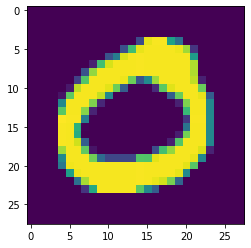

In [2]:
if __name__ == '__main__':
    main()
